# Arabic News Classification - 01

## Model Construction and Evaluation

This notebook contains the first simple models created to determine which model to be refined going forward. This notebook will take 30 or more minutes to run. The models created are Multinomial Naïve Bayes (`MultinomialNB`), Random Forest (`RandomForestClassifier`), Gradient Boosting (`GradientBoostingClassifier`), and Support Vector (`SVC`), all from `sklearn`. The least computationally expensive has been found to be the Multinomial Naïve Bayes model, and it has the added benefit that it can be partially trained, meaning that batches of files can be used to train the model without requiring that the entirety of the corpus be stored in memory.

The highest performing model was the Random Forest Classifier, but given that the model with the lowest performance (i.e. Naive Bayes) achieved over 95 % accuracy on the testing data in the initial subset and because it can be batch-trained, it will be used to create a final model.

In [6]:
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

from tools import misc
import tools.visualizations as vis

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

The subset of data containing 6500 articles from each of the 7 categories was obtained from the <a href="https://data.mendeley.com/datasets/57zpx667y9/2">SANAD corpus</a> and will be used to generate simple models without tuning. This corpus  subset was stored (via pickle) as a dataframe for easy use.

In [72]:
data = misc.load('raw_data/corpus_df.pkl')
data.head()

,cls,text
id,,
0,sports,أعلن المدرب النمسوي لبوروسيا دورتموند بيتر شتو...
1,sports,ذكرت وسائل الإعلام البلغارية الجمعة ان العداءة...
2,sports,برز اسم نجم مانشستر يونايتد رايان غيغز (36 عام...
3,sports,قال مدرب نادي انتر ميلان الإيطالي خوزيه موريني...
4,sports,بيتر تشيك: حارس مرمى تشيكي ولد في 20 مايو عام ...


In [5]:
X = data['text']
y = data['cls']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=misc.TEST_SIZE, 
                                                    random_state=misc.SEED,)

### Vectorizers

In [7]:
stopwords = misc.get_stopwords(misc.STOPWORDS_URL)

In [8]:
countvec = CountVectorizer(
    lowercase=False,
    stop_words=stopwords,
    strip_accents='unicode',
    token_pattern=PATTERN,
    max_features=MAX_FEATURES
)

tfidfvec = TfidfVectorizer(
    lowercase=False,
    stop_words=stopwords,
    strip_accents='unicode',
    token_pattern=PATTERN,
    max_features=MAX_FEATURES
)

In [9]:
# X_train_cv = countvec.fit_transform(X_train)
# X_test_cv = countvec.transform(X_test)
# cv_vocab = countvec.vocabulary_

# X_train_tf = tfidfvec.fit_transform(X_train)
# X_test_tf = tfidfvec.transform(X_test)
# tf_vocab = tfidfvec.vocabulary_

### Model Pipelines

In [10]:
pipe_nb = Pipeline([
    ('Count Vectorizer', countvec),
    ('Naive Bayes', MultinomialNB())
], verbose=True)

pipe_rfc = Pipeline([
    ('Count Vectorizer', countvec),
    ('Random Forest Classifier', RandomForestClassifier())
], verbose=True)

pipe_gbc = Pipeline([
    ('Count Vectorizer', countvec),
    ('Gradient Boosting Classifier', GradientBoostingClassifier())
], verbose=True)

pipe_svc = Pipeline([
    ('Count Vectorizer', countvec),
    ('Support Vector Classifier', SVC())
], verbose=True)

In [11]:
pipe_nb_tf = Pipeline([
    ('TF-IDF Vectorizer', tfidfvec),
    ('Naive Bayes', MultinomialNB())
], verbose=True)

pipe_rfc_tf = Pipeline([
    ('TF-IDF Vectorizer', tfidfvec),
    ('Random Forest Classifier', RandomForestClassifier())
], verbose=True)

pipe_gbc_tf = Pipeline([
    ('TF-IDF Vectorizer', tfidfvec),
    ('Gradient Boosting Classifier', GradientBoostingClassifier())
], verbose=True)

pipe_svc_tf = Pipeline([
    ('TF-IDF Vectorizer', tfidfvec),
    ('Support Vector Classifier', SVC())
], verbose=True)

In [12]:
pipelines_cv = [pipe_nb, pipe_rfc, pipe_gbc, pipe_svc]
pipelines_tf = [pipe_nb_tf, pipe_rfc_tf, pipe_gbc_tf, pipe_svc_tf]

In [13]:
pipelines_fitted_cv = []
pipelines_fitted_tf = []

for i in range(len(pipelines_cv)):
    cv_fitted = pipelines_cv[i].fit(X_train, y_train)
    pipelines_fitted_cv.append(cv_fitted)
    misc.save(cv_fitted, f'outputs/models/cv{i}.pkl')

[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.8s
[Pipeline] ....... (step 2 of 2) Processing Naive Bayes, total=   0.1s
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.4s
[Pipeline] ....... (step 2 of 2) Processing Naive Bayes, total=   0.1s
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.6s
[Pipeline]  (step 2 of 2) Processing Random Forest Classifier, total=  56.8s
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.7s
[Pipeline]  (step 2 of 2) Processing Random Forest Classifier, total=  56.3s
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.5s
[Pipeline]  (step 2 of 2) Processing Gradient Boosting Classifier, total= 3.3min
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  16.1s
[Pipeline]  (step 2 of 2) Processing Gradient Boosting Classifier, total= 3.4min
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.8s
[Pipeline]  (step 2 of 2) Processing Support 

## Naïve Bayes

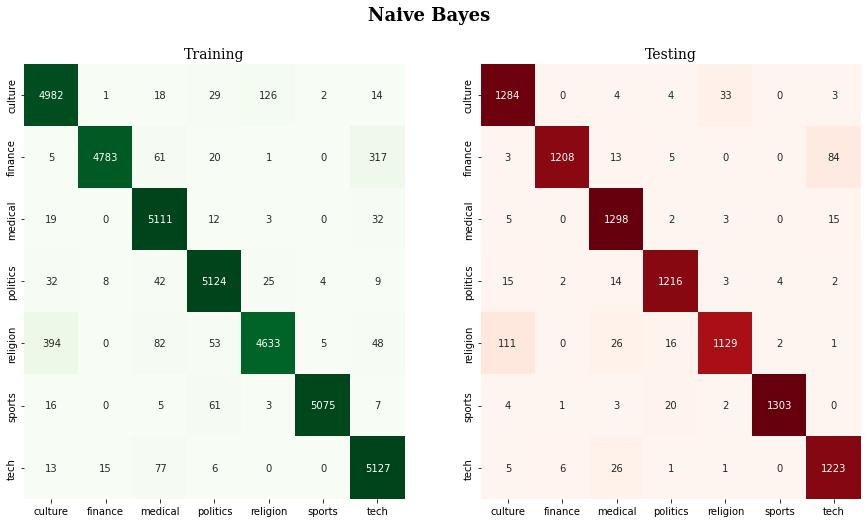

In [66]:
vis.plot_confusion_matrices(pipe_nb, X_train, X_test, y_train, y_test)
plt.show()

## Random Forest Classifier

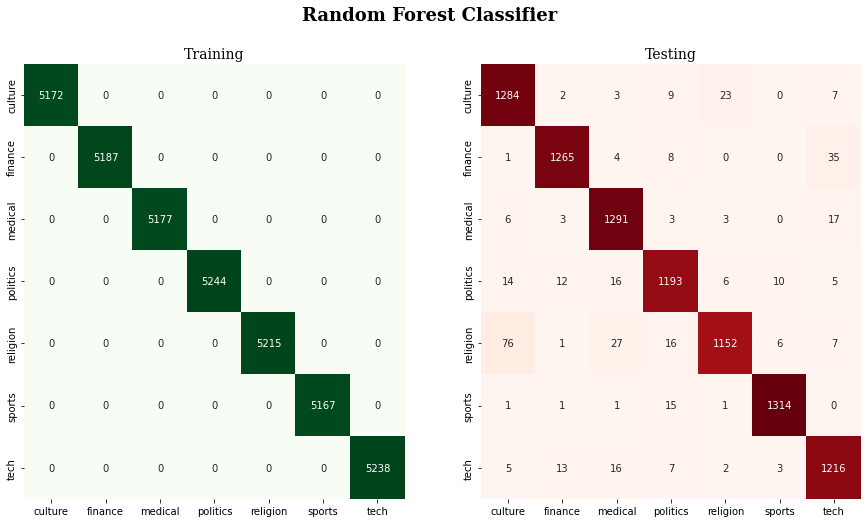

In [68]:
vis.plot_confusion_matrices(pipe_rfc, X_train, X_test, y_train, y_test)
plt.show()

## Gradient Boosting Classifier

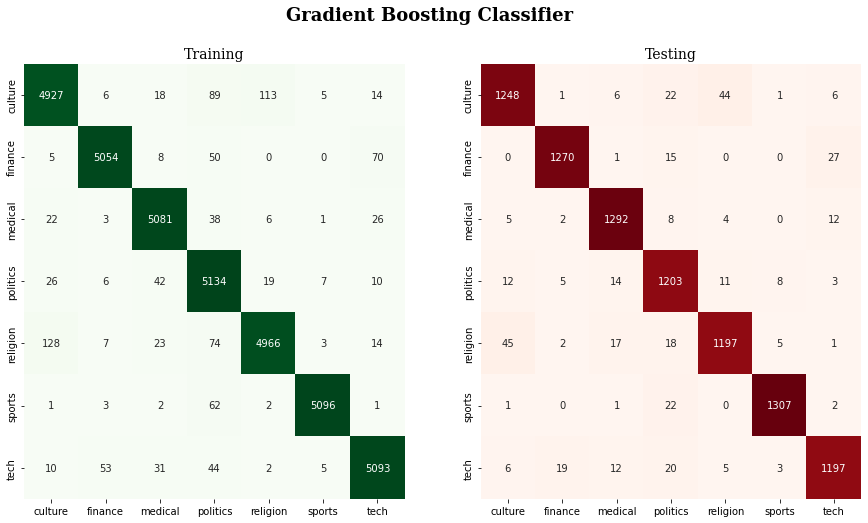

In [70]:
vis.plot_confusion_matrices(pipe_gbc, X_train, X_test, y_train, y_test)
plt.show()

## Support Vector Classifier

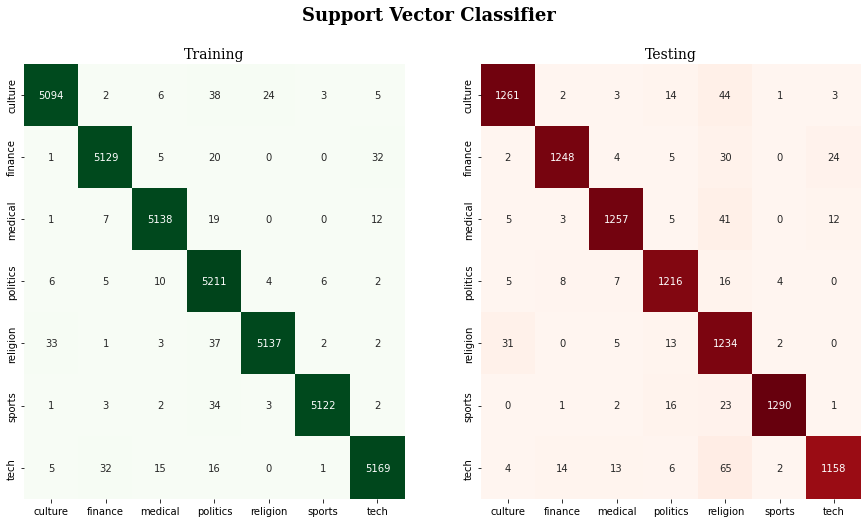

In [71]:
vis.plot_confusion_matrices(pipe_svc, X_train, X_test, y_train, y_test)
plt.show()